In [3]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd
CURRENCY = 'EUR'
'''
def getData(crypto):
    data = yf.download(
        tickers=f'{crypto}-{CURRENCY}',
        period="1y",
        interval="1d",
        auto_adjust=True
    )
    return data
btc_data = getData('BTC')
if btc_data is not None:
    print("Actual Column:", btc_data.columns)
    
    def get_column(data, col_type):
        for col in data.columns:
            if col_type.lower() in str(col).lower():
                return data[col]
        raise KeyError(f"col_type}nOTFound")
    
    fig = go.Figure(data=[go.Candlestick(
        x=btc_data.index,
        open=get_column(btc_data, 'Open'),    # 自动检测
        high=get_column(btc_data, 'High'),
        low=get_column(btc_data, 'Low'),
        close=get_column(btc_data, 'Close'),
        increasing_line_color='#2ECC71',
        decreasing_line_color='#E74C3C'
    )])
    
    fig.update_layout(
        title=f'BTC/{CURRENCY} 价格走势',
        xaxis_title='日期',
        yaxis_title=f'价格 ({CURRENCY})',
        template='plotly_dark',
        xaxis_rangeslider_visible=True
    )
    fig.show()
    btc_data.to_csv('btc_eur_data.csv')
else:
    print("数据获取失败")
    '''
import requests  # take the website source code back to you
import urllib  # some useful functions to deal with website URLs
from bs4 import BeautifulSoup as soup  # a package to parse website source code
import numpy as np  # all the numerical calculation related methods
import re  # regular expression package
import itertools  # a package to do iteration works
import pickle  # a package to save your file temporarily
import pandas as pd  # process structured data
import os
sub_dir = os.getcwd() + '/DEDA_class2019_SYSU_Abstract_LDA_Crawler/'
cwd_dir = sub_dir if os.path.exists(sub_dir) else os.getcwd()  # the path you save your files
base_link = 'http://www.wiwi.hu-berlin.de/de/forschung/irtg/results/discussion-papers'  # This link can represent the domain of a series of websites
abs_link = 'https://www.wiwi.hu-berlin.de/de/forschung/irtg/results/'
# abs_folder = cwd_dir + 'Abstracts/'
# os.makedirs(abs_folder, exist_ok=True)
request_result = requests.get(base_link, headers={'Connection': 'close'})  # get source code
parsed = soup(request_result.content)  # parse source code
tr_items = parsed.find_all('tr')
info_list = []
for item in tr_items:
    link_list = item.find_all('td')
    try:
        paper_title = re.sub(pattern=r'\s+', repl=' ', string=link_list[1].text.strip())
        author = link_list[2].text
        date_of_issue = link_list[3].text
        abstract_link = link_list[5].find('a')['href']
        info_list.append([paper_title, author, date_of_issue, abstract_link])
    except Exception as e:
        print(e)
        print(link_list[5])
        continue

abstract_all = list()
for paper in info_list:
    print(paper[0])
    try:
        paper_abstract_page = requests.get(paper[3], headers={'Connection': 'close'})

        if paper_abstract_page.status_code == 200:
            # if paper[3][-3:] == 'txt':
            abstract_parsed = soup(paper_abstract_page.content)
            main_part = abstract_parsed.find_all('div', attrs={'id': r'content-core'})[0].text.strip()
            # if paper[3][-3:] == 'pdf':
            #     abstract_parsed = soup(paper_abstract_page.content)
            #     main_part = abstract_parsed.find_all('body')[0].text.strip()
            main_part = re.sub(r'.+?[Aa]bstract', 'Abstract', main_part)
            main_part = re.sub(r'JEL [Cc]lassification:.*', '', main_part)
            main_part = re.sub(r'[A-Za-z][0-9][0-9]?', '', main_part)
            main_part = re.sub('[\r\n]+', ' ', main_part)
            abstract_all.append(main_part + "\nSEP\n")

        else:
            raise ConnectionError(f"Can not access the website. Error Code: {paper_abstract_page.status_code}")
        # with open(abs_folder + f"{re.sub('[^a-zA-Z0-9 ]', '', paper[0])}.txt", 'w', encoding='utf-8') as abs_f:
        #     abs_f.write(main_part)

    except Exception as e:
        print(e)
        print(paper[3])
        continue
with open(cwd_dir + '/Abstract_all.txt', 'w', encoding='utf-8') as abs_all_f:
    abs_all_f.writelines(abstract_all)

'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" style="width: 40px; height: 18px;"><span style="--darkreader-inline-bgcolor: #262b35;"><strong><span style="font-family: sans-serif, Arial, Helvetica, Geneva;">Abstract</span></strong></span></td>
'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" style="width: 40px; height: 18px;"><span style="--darkreader-inline-bgcolor: #262b35;"><strong><span style="font-family: sans-serif, Arial, Helvetica, Geneva;">Abstract</span></strong></span></td>
'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" height="18" style="--darkreader-inline-bgcolor: #262b35;" width="40"><strong><span style="font-family: sans-serif, Arial, Helvetica, Geneva;">Abstract</span></strong></td>
'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" height="18" style="--darkreader-inline-bgcolor: #262b3

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 1:
model nonparametric selection index estimation data variable crix price volatility
Topic 2:
network cryptocurrencies tail dynamic event risk inference driven evidence measure
Topic 3:
market machine effect learning risk cryptocurrency financial bitcoin meter testing
Topic 4:
model forecasting risk approach adaptive data estimation learning deep dynamic


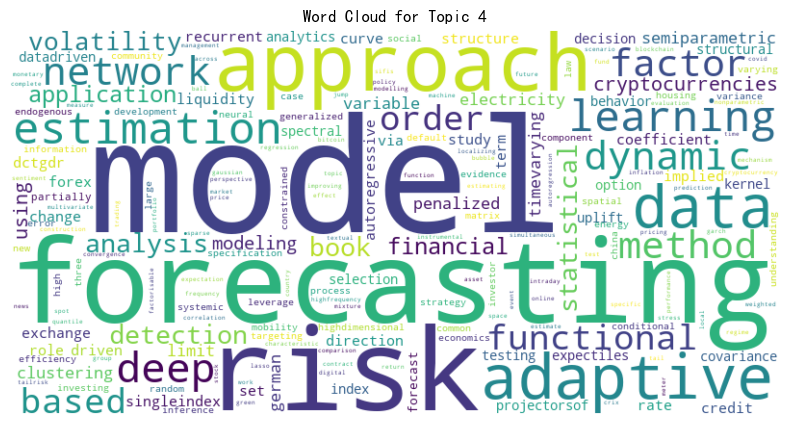

'\nsave_path = \'abstract\\\'  # the path you save your files\nbase_link = \'http://www.wiwi.hu-berlin.de/de/forschung/irtg/results/discussion-papers\'  # This link can represent the domain of a series of websites\nrequest_result = requests.get(base_link, headers = {\'Connection\': \'close\'}) # get source code\nparsed = soup(request_result.content) # parse source code\ntr_items = parsed.find_all(\'tr\')\ninfo_list = [];\nfor item in tr_items:\n    link_list = item.find_all(\'td\')\n    try:\n        paper_title = (link_list[1].text.strip())\n        author = (link_list[2].text)\n        date_of_issue = (link_list[3].text)\n        abstract_link = (link_list[5].find(\'a\')[\'href\'])\n        tmp_list = [paper_title,author,date_of_issue,abstract_link];\n        info_list.append(tmp_list)\n    except Exception as e:\n        print(e)\n        print(link_list[5])\n        continue\nf_all = open(\'Abstract_all.txt\',\'w\',encoding=\'utf-8\')\nfor paper in info_list:\n    print(paper[0])\n

In [7]:
import requests  # take the website source code back to you
import urllib  # some useful functions to deal with website URLs
from bs4 import BeautifulSoup as soup  # a package to parse website source code
import numpy as np  # all the numerical calculation related methods
import re  # regular expression package
import itertools  # a package to do iteration works
import pickle  # a package to save your file temporarily
import pandas as pd  # process structured data
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
# Set Chinese font for word cloud (if needed)
plt.rcParams['font.sans-serif'] = ['SimHei']  # For Chinese characters
plt.rcParams['axes.unicode_minus'] = False

# Load your Excel file
file_path = r"D:\DEDA_2025年暑假\Irtg_Results_Berlin.xlsx"
df = pd.read_excel(file_path)

# Text preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Remove short words
    tokens = [word for word in tokens if len(word) > 2]
    
    return ' '.join(tokens)

# Preprocess all documents
df['processed_text'] = df['Abstract'].apply(preprocess_text)  # Change 'Abstract' to your actual column name

# Create document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
dtm = vectorizer.fit_transform(df['processed_text'])
# LDA Model
num_topics = 4  
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)
# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)
# Create word cloud for the most prominent topic
topic_values = lda.transform(dtm)
dominant_topic = np.argmax(topic_values, axis=1)
most_common_topic = np.argmax(np.bincount(dominant_topic))
# Get words for the most common topic
topic_words = dict()
for i, word in enumerate(vectorizer.get_feature_names_out()):
    topic_words[word] = lda.components_[most_common_topic][i]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Topic {most_common_topic + 1}')
plt.show()
wordcloud.to_file("topic_wordcloud.png")